In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
FilePath = os.path.join(os.getcwd(), 'Windows_Data/dataset.csv')
dataset = pd.read_csv(FilePath)

In [46]:
dataset_no_dups = dataset.drop_duplicates(subset=None, keep=False)
Set = dataset_no_dups.drop(dataset_no_dups[(dataset_no_dups.label == 0) & (dataset_no_dups.max_smv < 17)].index)
X = Set[['max_smv', 'min_smv', 'duration']].values
y = Set[['label']].values
print(Set.loc[dataset['label'] == 1].describe())
print(Set.loc[dataset['label'] == 0].describe())

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=1)
X_train_resample, y_train_resample = over.fit_resample(X_train, y_train)
X_train_resample, y_train_resample = under.fit_resample(X_train, y_train)

          max_smv     min_smv    duration  label
count  127.000000  127.000000  127.000000  127.0
mean    25.221958    4.570352    0.031496    1.0
std      2.918982    1.621344   90.295453    0.0
min     17.128696    0.838504 -262.000000    1.0
25%     23.068876    3.245285  -48.500000    1.0
50%     25.201343    4.558423   17.000000    1.0
75%     27.438482    5.794097   49.000000    1.0
max     32.505287    7.880321  432.000000    1.0
            max_smv       min_smv      duration    label
count  10013.000000  10013.000000  10013.000000  10013.0
mean      22.275489      2.864994    -17.926396      0.0
std        2.709789      1.802601    477.441668      0.0
min       17.000608      0.030987   -993.000000      0.0
25%       20.264987      1.092221   -365.000000      0.0
50%       22.135603      3.060025    -20.000000      0.0
75%       24.083629      4.234462    293.000000      0.0
max       32.430852      9.237574    989.000000      0.0


In [ ]:
resample_fall = pd.DataFrame(np.squeeze(X[np.argwhere(y == 1)]), 
                                        columns=['max_smv','min_smv','duration'])
resample_normal = pd.DataFrame(np.squeeze(X[np.argwhere(y == 0)]), 
                                        columns=['max_smv','min_smv','duration'])
print(resample_fall.describe())
print(resample_normal.describe())

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=60, min_samples_leaf=2, min_samples_split=5, n_estimators=100)
clf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(max_depth=60, min_samples_leaf=2, min_samples_split=5)

Accuracy on resampled training set: 0.967741935483871
Accuracy on original training set: 0.8735042735042735
Accuracy on testing set: 0.8808678500986193
f1 score on testing set: 0.17032967032967034


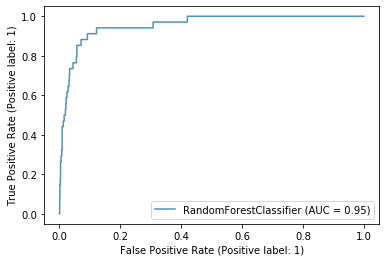

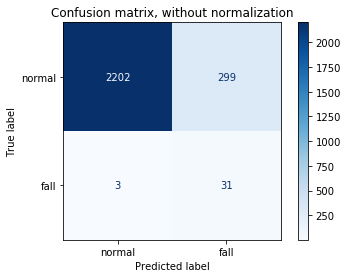

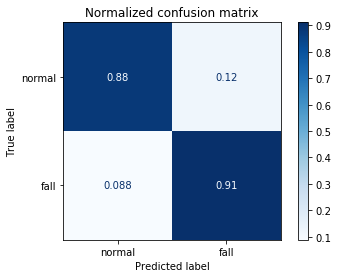

In [78]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

print('Accuracy on resampled training set: {}'.format(clf.score(X_train_resample, y_train_resample)))
print('Accuracy on original training set: {}'.format(clf.score(X_train, y_train)))
print('Accuracy on testing set: {}'.format(clf.score(X_test, y_test)))
print('-'*50)
y_pred = clf.predict(X_test)
print('f1 score on testing set: {}'.format(f1_score(y_test, y_pred)))
print('f1 score on testing set: {}'.format(recall_(y_test, y_pred)))
print('f1 score on testing set: {}'.format(f1_score(y_test, y_pred)))
# Plot ROC curve 
ax = plt.gca()
rfc_disp = plot_roc_curve(clf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

# Plot nonnormalized / normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels= ['normal', 'fall'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    plt.show()